In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("C:/Users/likes/Downloads/emotion_dataset_raw(1).csv", encoding="ISO-8859-1")

In [4]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [5]:
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

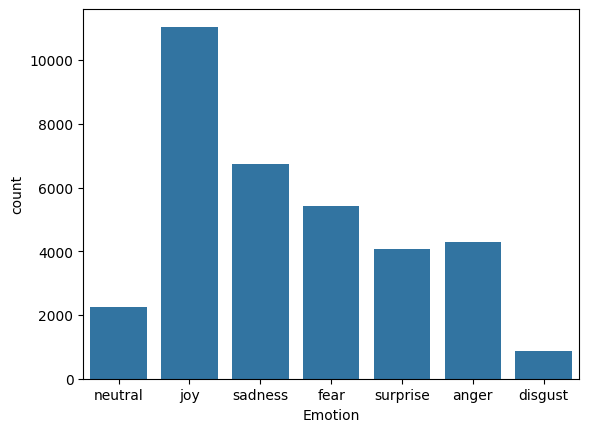

In [6]:
sns.countplot(x='Emotion',data=df)

In [8]:
import neattext.functions as nfx

# Remove the user handles
# Ensure all values in 'Text' are strings before applying the function
df['Clean_Text'] = df['Text'].astype(str).apply(nfx.remove_userhandles)


In [9]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [10]:
# Remove the stopwords- and,a,the...etc
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [11]:
df

,Emotion,Text,Clean_Text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...
34785,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34786,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34787,anger,A man robbed me today .,man robbed today .
34788,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


In [12]:
#x: Features are the attributes and variables extracted from the dataset. These extracted features are used as inputs to the model during training.

#y: Labels are the output or the target variable.

x = df['Clean_Text']
y = df['Emotion']

In [14]:
#Splitting data into train and test set
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [15]:
#Training the model
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [17]:
x_train = x_train.dropna()
y_train = y_train.loc[x_train.index]  # Ensure y_train matches x_train


In [18]:
x_train = x_train.fillna(" ")  # Replace NaN in text data with empty string
y_train = y_train.fillna(y_train.mode()[0])  # Fill NaN in labels with the most common class


In [19]:
print(x_train.isnull().sum())  # Check missing values in features
print(y_train.isnull().sum())  # Check missing values in labels


0
0


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

# Ensure labels are of the same type (convert to strings)
y_train = y_train.astype(str)
y_test = y_test.astype(str)

# Define and train the pipeline with increased max_iter
pipe_lr = Pipeline(steps=[
    ('cv', CountVectorizer()),
    ('lr', LogisticRegression(max_iter=1000))
])

pipe_lr.fit(x_train, y_train)
print("Model Accuracy:", pipe_lr.score(x_test, y_test))


Model Accuracy: 0.6253712752706716


In [22]:
pipe_svm = Pipeline(steps=[('cv',CountVectorizer()),('svc', SVC(kernel = 'rbf', C = 10))])
pipe_svm.fit(x_train,y_train)
pipe_svm.score(x_test,y_test)

0.6194308709399252

In [24]:
pipe_rf = Pipeline(steps=[('cv',CountVectorizer()),('rf', RandomForestClassifier(n_estimators=10))])
pipe_rf.fit(x_train,y_train)
pipe_rf.score(x_test,y_test)

0.5533199195171026

In [25]:
import joblib
pipeline_file = open("text_emotion.pkl","wb") #created and in write binary mode
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()